In [1]:
import zipfile
import os

# Path to the ZIP file
zip_file_path = '2018-2019_Daily_Attendance_20240429.csv.zip'

# Directory to extract the files
extract_dir = 'extracted_data'

# Create the directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extraction complete.")


Extraction complete.


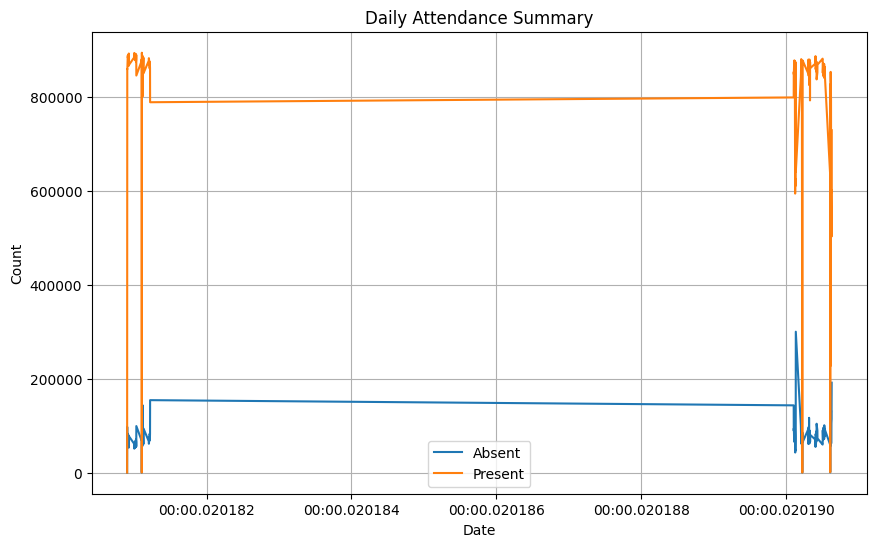

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
file_path = 'extracted_data/2018-2019_Daily_Attendance_20240429.csv'
data = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Group data by Date and calculate total Absent and Present counts
daily_summary = data.groupby('Date').agg({'Absent': 'sum', 'Present': 'sum'}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(daily_summary['Date'], daily_summary['Absent'], label='Absent')
plt.plot(daily_summary['Date'], daily_summary['Present'], label='Present')
plt.title('Daily Attendance Summary')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
# Overall absent rate and present rate
total_absent = data['Absent'].sum()
total_present = data['Present'].sum()
total_students = total_absent + total_present
absent_rate = (total_absent / total_students) * 100
present_rate = (total_present / total_students) * 100
print(f"Overall Absent Rate: {absent_rate:.2f}%")
print(f"Overall Present Rate: {present_rate:.2f}%")

# Average daily absent and present counts
average_daily_absent = data['Absent'].mean()
average_daily_present = data['Present'].mean()
print(f"Average Daily Absent Count: {average_daily_absent:.2f}")
print(f"Average Daily Present Count: {average_daily_present:.2f}")

# Days with highest and lowest absent counts
max_absent_day = data.loc[data['Absent'].idxmax(), 'Date']
min_absent_day = data.loc[data['Absent'].idxmin(), 'Date']
print(f"Day with Highest Absent Count: {max_absent_day}")
print(f"Day with Lowest Absent Count: {min_absent_day}")

# Distribution of absent and present counts over weekdays
data['Weekday'] = data['Date'].dt.day_name()
weekday_distribution = data.groupby('Weekday').agg({'Absent': 'mean', 'Present': 'mean'})
print("Weekday Attendance Distribution:")
print(weekday_distribution)

# Compare absent and present counts before and after specific events or holidays
# For example, you can define a specific date and compare attendance before and after that date


Overall Absent Rate: 8.49%
Overall Present Rate: 91.51%
Average Daily Absent Count: 50.50
Average Daily Present Count: 544.50
Day with Highest Absent Count: 1970-01-01 00:00:00.020190617
Day with Lowest Absent Count: 1970-01-01 00:00:00.020181003
Weekday Attendance Distribution:
             Absent     Present
Weekday                        
Thursday  50.503538  544.499403


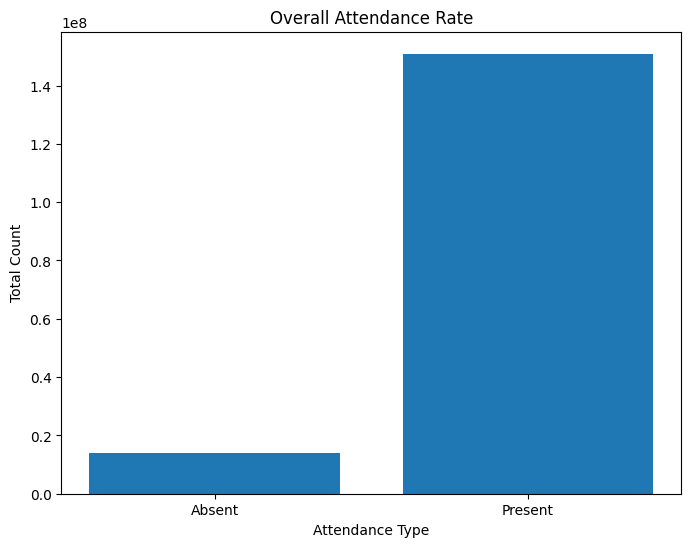

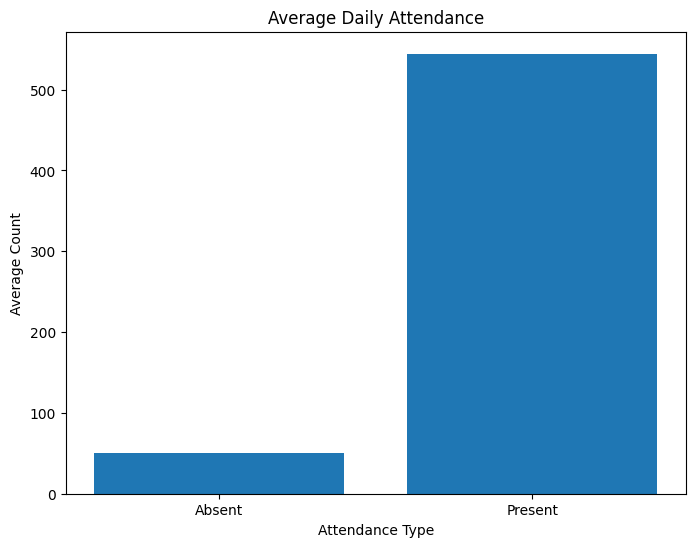

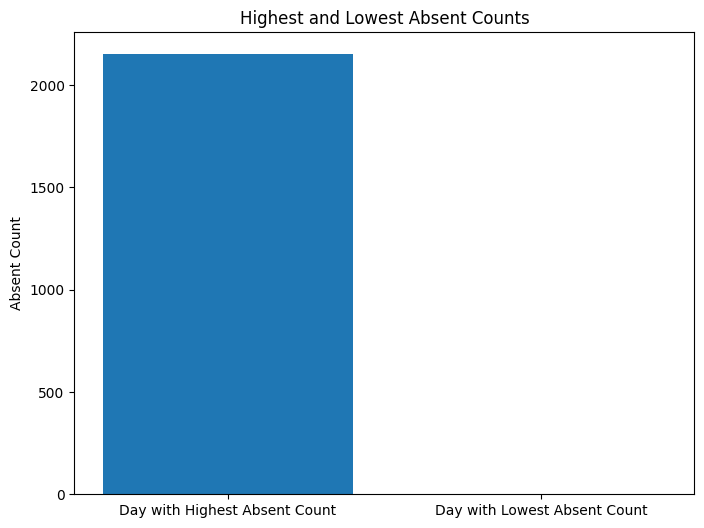

<Figure size 1000x600 with 0 Axes>

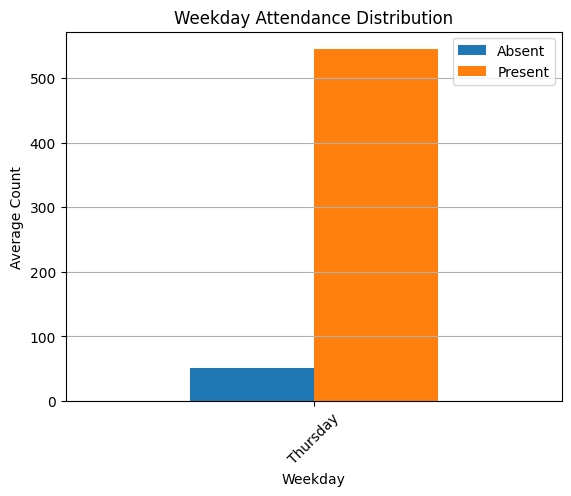

In [4]:
# Overall absent rate and present rate
plt.figure(figsize=(8, 6))
plt.bar(['Absent', 'Present'], [total_absent, total_present])
plt.title('Overall Attendance Rate')
plt.xlabel('Attendance Type')
plt.ylabel('Total Count')
plt.show()

# Average daily absent and present counts
plt.figure(figsize=(8, 6))
plt.bar(['Absent', 'Present'], [average_daily_absent, average_daily_present])
plt.title('Average Daily Attendance')
plt.xlabel('Attendance Type')
plt.ylabel('Average Count')
plt.show()

# Days with highest and lowest absent counts
plt.figure(figsize=(8, 6))
plt.bar(['Day with Highest Absent Count', 'Day with Lowest Absent Count'], [data['Absent'].max(), data['Absent'].min()])
plt.title('Highest and Lowest Absent Counts')
plt.ylabel('Absent Count')
plt.show()

# Distribution of absent and present counts over weekdays
plt.figure(figsize=(10, 6))
weekday_distribution.plot(kind='bar')
plt.title('Weekday Attendance Distribution')
plt.xlabel('Weekday')
plt.ylabel('Average Count')
plt.xticks(rotation=45)
plt.legend(['Absent', 'Present'])
plt.grid(axis='y')
plt.show()


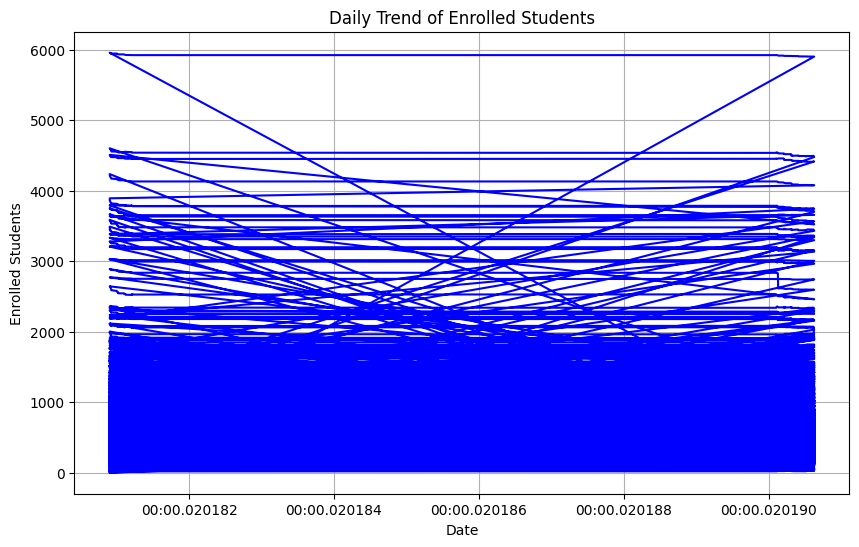

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Enrolled'], color='blue')
plt.title('Daily Trend of Enrolled Students')
plt.xlabel('Date')
plt.ylabel('Enrolled Students')
plt.grid(True)
plt.show()

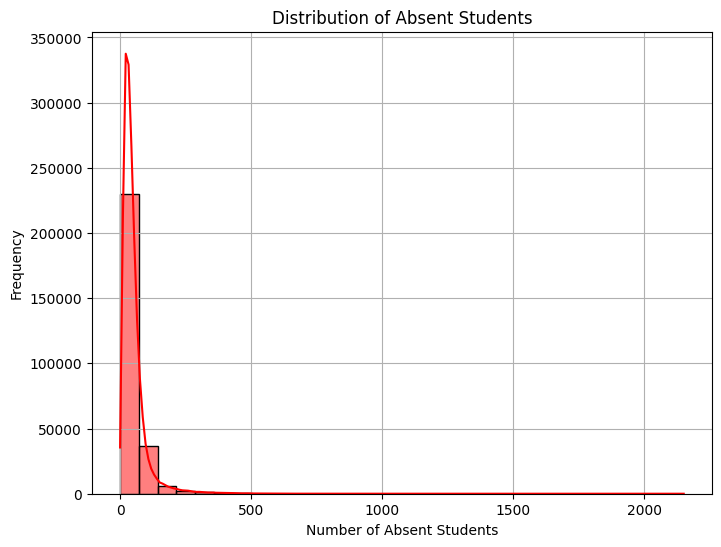

In [9]:
# Distribution of absent students
plt.figure(figsize=(8, 6))
sns.histplot(data['Absent'], bins=30, kde=True, color='red')
plt.title('Distribution of Absent Students')
plt.xlabel('Number of Absent Students')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()